In [1]:
#Figure 2E graph plotting 
#v1.0 version, this is the first consolidation of analysis done so far
#Requires the environment packages found in 23pubenv

In [1]:
#General Import Packages: 
#Plotting
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import LineCollection
import seaborn as sns

#Numerics, model implementation, path management, extras: 
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stat


In [2]:
#Custom function to read in centroid arrays into dataframe instead of as a string: 
def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [3]:
#Defining a basic power law function to fit to our wave relations r^2:
def func_powerlaw(x, a, m):
    return m*x**a

In [4]:
#Importing the relevant data frames is done using the following structure: 

#Set the base path as the root for an analysis set, all sets are arranged where images and analysis outputs are in the following locations: 
base_path = Path.cwd().parent / 'Fig2 - Wave kinetics/indiv_fits/'
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})


In [5]:
#Pulling the individual fits from a previously saved analysis:
wt_df = pd.read_csv(base_path / 'fig2-wt-individual-fits.csv')
ltb4_block_df = pd.read_csv(base_path / 'fig2-ltb4-block-individual-fits.csv')

In [6]:
#Need to rename the wt and drug conditons appropriately here for clarity:
wt_df['drug'] = 'None'
ltb4_block_df['drug'] = 'BIIL315'


main_df = pd.concat([wt_df, ltb4_block_df], ignore_index=True)


In [7]:
#Running the ttest between the wt and drug mean alpha catagories: 
stat.ttest_ind(main_df[main_df['drug'] == 'None'].alpha.values, main_df[main_df['drug'] == 'BIIL315'].alpha.values, equal_var=False)


TtestResult(statistic=7.274346389063005, pvalue=4.0222942420323924e-08, df=30.262491908055548)

In [8]:
#Common formatting:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})


/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

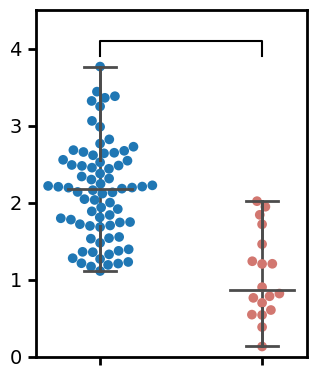

In [10]:
#Print out figure 2e: 
fig, ax = plt.subplots(figsize=(3.5,4.5))
sns.boxplot(data=main_df, x='drug', y='alpha', palette=[sns.color_palette()[7],sns.color_palette()[7]],  width=0.001, ax=ax, zorder=2)
sns.boxplot(data=main_df, x='drug', y='alpha', palette=[sns.color_palette()[7],sns.color_palette()[7]],  showbox=False, width=0.4, ax=ax, zorder=3)
sns.swarmplot(data=main_df, x='drug', y='alpha', palette=[sns.color_palette()[0],"#D27770"], size=7, ax=ax, zorder=1)
ax.tick_params(direction='out', width=2.0, labelsize=14)
#plt.ylim(0,50000)
plt.xlabel('')
plt.xticks([0,1],['',''])
plt.ylabel('')


# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = 3.9, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "", ha='center', va='bottom', color=col)
plt.ylim(0,4.5)
plt.savefig('fig2-normal-v-ltb4-block-wave-fits.png', dpi=300, bbox_inches='tight')

In [11]:
#Print out the values of these fits and graph above to put in text, caption: 
print('BIIL315 Fit alpha summary: {} +/- {}'.format(round(ltb4_block_df['alpha'].mean(),1), round(ltb4_block_df['alpha'].std(),1)))
print('WT Fit alpha summary: {} +/- {}'.format(round(wt_df['alpha'].mean(),1), round(wt_df['alpha'].std(),1)))

BIIL315 Fit alpha summary: 1.0 +/- 0.6
WT Fit alpha summary: 2.2 +/- 0.7
